<h1 style="font-size: 50px; color: lightblue; text-align:center; font-weight: bolder;"> Strategy 3: Neural Network (MLP) Regressor Strategy </h1>



<br>


<!-- Add font awesome icons -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/css/all.min.css" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/js/all.min.js"></script>

<!-- Contents -->
<a id="index" style="font-size: 28px; color: lightblue; font-weight:bolder; text-decoration: none;">Contents</a>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<a href="#1" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;">1. Importing data and libraries</a>

<a href="#2" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">2. Time Series Exploration</a>
<ul style="color: #033a91">
    <li><a href="#2.1" style="color: #033a91; text-decoration: none;"> 2.1 SPDR Return Time Series</a></li>
  <li><a href="#2.2" style="color: #033a91; text-decoration: none;">2.2 EFFR Time Series</a></li>
  <li><a href="#2.3" style="color: #033a91; text-decoration: none;">2.3 Daily Excess Return Time Series</a></li>
</ul>

<a href="#3" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">3. Setting up the model</a>
<ul style="color: #033a91">
    <li><a href="#3.1" style="color: #033a91; text-decoration: none;">3.1 Hyperparameter Tuning of the Model</a></li>
  <li><a href="#3.2" style="color: #033a91; text-decoration: none;">3.2 Training the Model</a></li>
</ul>

<a href="#4" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">4. Neural Network (MLP) Regressor Strategy</a>
<ul style="color: #033a91">
    <li><a href="#4.1" style="color: #033a91; text-decoration: none;">4.1 Training Set Strategy</a></li>
  <li><a href="#4.2" style="color: #033a91; text-decoration: none;">4.2 Test Set Neural Network (MLP) Regressor Strategy</a></li>
</ul>

<a href="#5" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;">5. Model Comparison</a>
<ul style="color: #033a91">
    <li><a href="#5.1" style="color: #033a91; text-decoration: none;">5.1 Position of Strategies Plot</a></li>
  <li><a href="#5.2" style="color: #033a91; text-decoration: none;">5.2 Turnover Dollars and Turnover Units</a></li>
    <li><a href="#5.3" style="color: #033a91; text-decoration: none;">5.3 Daily Trading PnL Plot</a></li>
    <li><a href="#5.4" style="color: #033a91; text-decoration: none;">5.4 Cumulative Trading PnL Plot</a></li>
    <li><a href="#5.5" style="color: #033a91; text-decoration: none;">5.5 Daily Cash Growth Plot</a></li>
    <li><a href="#5.6" style="color: #033a91; text-decoration: none;">5.6 Cumulative Cash Growth Plot</a></li>
    <li><a href="#5.7" style="color: #033a91; text-decoration: none;">5.7 Daily Total PnL Plot</a></li>
    <li><a href="#5.8" style="color: #033a91; text-decoration: none;">5.8 Cumulative Total PnL Plot</a></li>
    <li><a href="#5.9" style="color: #033a91; text-decoration: none;">5.9 Sharpe Ratio</a></li>
    <li><a href="#5.10" style="color: #033a91; text-decoration: none;">5.10 Sortino Ratio</a></li>
    <li><a href="#5.11" style="color: #033a91; text-decoration: none;">5.11 Maximum Drawdown</a></li>
    <li><a href="#5.12" style="color: #033a91; text-decoration: none;">5.12 Calmar Ratio</a></li>
    <li><a href="#5.13" style="color: #033a91; text-decoration: none;">5.13 Drawdown Chart and 90-day stock volatility</a></li>
    <li><a href="#5.14" style="color: #033a91; text-decoration: none;">5.14 Plot of 3 strategies' avg. excess returns and spdr avg. excess return against their std. deviations - <strong>In Strategy 1 Code</strong></a></li>
</ul>


<script src="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.3/js/all.min.js"></script>

<br id="1">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 1. Importing data and libraries </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

In [7]:
!pip install fredapi

In [79]:
!pip install pmdarima

     |████████████████████████████████| 608 kB 1.7 MB/s eta 0:00:01


In [19]:
import yfinance as yf
import datetime as dt
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

<br id="2">
<a href="#index" style="color:#033a91;  font-size: 22px; text-decoration: none; font-weight:bold;"> 2. Time Series Exploration </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


In [2]:
start_date = dt.datetime(2014, 1, 1)
end_date = dt.datetime(2019, 12, 31)
symbol = "SPY"

spy = yf.download(symbol, start=start_date, end=end_date)

spy["spdr_return"] = spy["Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


In [3]:
spy #our focus is on closing prices

,Open,High,Low,Close,Adj Close,Volume,spdr_return
Date,,,,,,,
2014-01-02 00:00:00-05:00,183.979996,184.070007,182.479996,182.919998,154.400253,119636900,NaN
2014-01-03 00:00:00-05:00,183.229996,183.600006,182.630005,182.889999,154.374924,81390600,-0.000164
2014-01-06 00:00:00-05:00,183.490005,183.559998,182.080002,182.360001,153.927567,108028200,-0.002898
2014-01-07 00:00:00-05:00,183.089996,183.789993,182.949997,183.479996,154.872986,86144200,0.006142
2014-01-08 00:00:00-05:00,183.449997,183.830002,182.889999,183.520004,154.906647,96582300,0.000218
...,...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,321.589996,321.649994,321.059998,321.220001,305.051178,52990000,0.001528
2019-12-24 00:00:00-05:00,321.470001,321.519989,320.899994,321.230011,305.060638,20270000,0.000031
2019-12-26 00:00:00-05:00,321.649994,322.950012,321.640015,322.940002,306.684601,30911200,0.005323


In [3]:
fred = Fred(api_key='81ae65057a007cf1c90c74a5deef3d3d')

In [4]:
fred

In [5]:
start_date = '2014-01-01'
end_date = '2019-12-31'
effr_name = 'EFFR'

effr = fred.get_series(effr_name, start_date, end_date)

#make EFFR a daily risk-free rate (in decimals rather than percentage)
effr = effr/25200 

#convert to a df in order to perform merging later
effr_data = pd.DataFrame(effr, columns=['effr_rate'])
effr_data.index.rename('date', inplace=True)
effr_data

# Convert index of spy DataFrame to timezone-aware
spy.index = pd.to_datetime(spy.index).tz_localize(effr_data.index.tz)

In [6]:
missing_values = effr.isna().sum()
print(missing_values)

58


In [7]:
# Filling missing values in effr_data with ffill
effr_data = effr_data.ffill()

In the context of economics and finance, filling missing values with ffill (forward fill) makes sense when we expect that the missing values are not significant departures from the underlying trend of the data. In other words, if we believe that the missing values are simply due to missing data points, and not due to any major shocks or structural changes in the economy, then it is reasonable to assume that the missing values are similar to the preceding values and can be filled using ffill.

In the case of the EFFR rate, which is the interest rate at which banks lend and borrow funds overnight from each other, it is generally expected to remain relatively stable over short periods of time. Therefore, filling missing values with ffill is reasonable, assuming that missing values are due to missing data points and not significant shocks or structural changes in the financial system. ALSO, we only have first row as NaN as ffil needs the closing price of the working day before 2014-01-01 which is not present in the data

In [8]:
merged_data = pd.merge(spy, effr_data, how="left", left_index = True, right_index = True)

# Calculate excess return
merged_data['excess_return'] = merged_data['Close'].pct_change() - merged_data['effr_rate']

#we only have one missing values which is the first row as pct change needs the previous closing price which has
#already been eliminated using left join
merged_data['excess_return'].isna().sum() #value is 1

#so we remove the first row
merged_data.drop(index=merged_data.index[0], inplace=True)
merged_data

,Open,High,Low,Close,Adj Close,Volume,spdr_return,effr_rate,excess_return
Date,,,,,,,,,
2014-01-03,183.229996,183.600006,182.630005,182.889999,154.374908,81390600,-0.000164,0.000003,-0.000167
2014-01-06,183.490005,183.559998,182.080002,182.360001,153.927582,108028200,-0.002898,0.000003,-0.002901
2014-01-07,183.089996,183.789993,182.949997,183.479996,154.872910,86144200,0.006142,0.000003,0.006139
2014-01-08,183.449997,183.830002,182.889999,183.520004,154.906693,96582300,0.000218,0.000003,0.000215
2014-01-09,184.110001,184.130005,182.800003,183.639999,155.007980,90683400,0.000654,0.000003,0.000651
...,...,...,...,...,...,...,...,...,...
2019-12-23,321.589996,321.649994,321.059998,321.220001,305.051208,52990000,0.001528,0.000062,0.001466
2019-12-24,321.470001,321.519989,320.899994,321.230011,305.060669,20270000,0.000031,0.000062,-0.000030
2019-12-26,321.649994,322.950012,321.640015,322.940002,306.684601,30911200,0.005323,0.000062,0.005262


<br id="2.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">  2.1 SPDR Return Time Series <a>

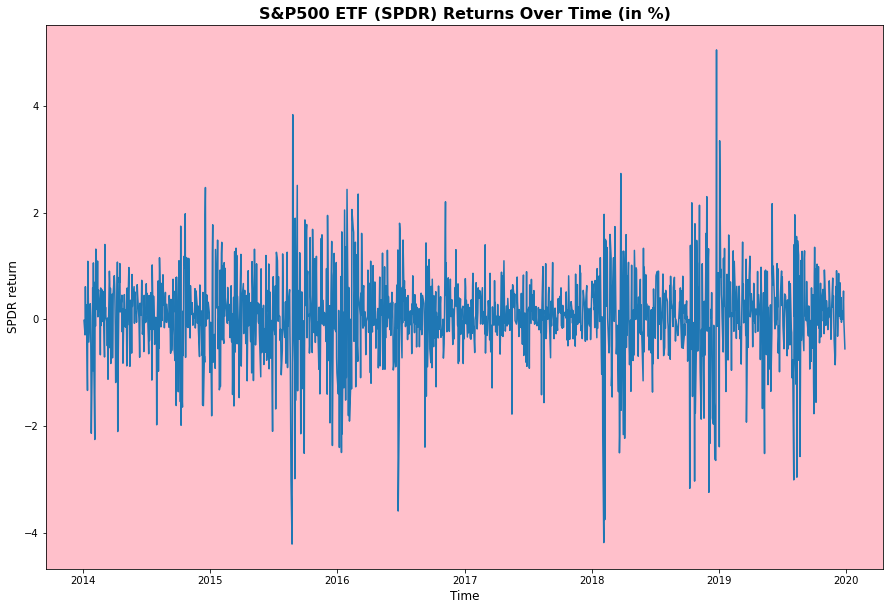

In [9]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["spdr_return"]*100)
ax.set_facecolor("pink")
ax.set_title('S&P500 ETF (SPDR) Returns Over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=12)
ax.set_ylabel("SPDR return",fontsize=12)

plt.show()

<br id="2.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.2 EFFR Time Series </a>

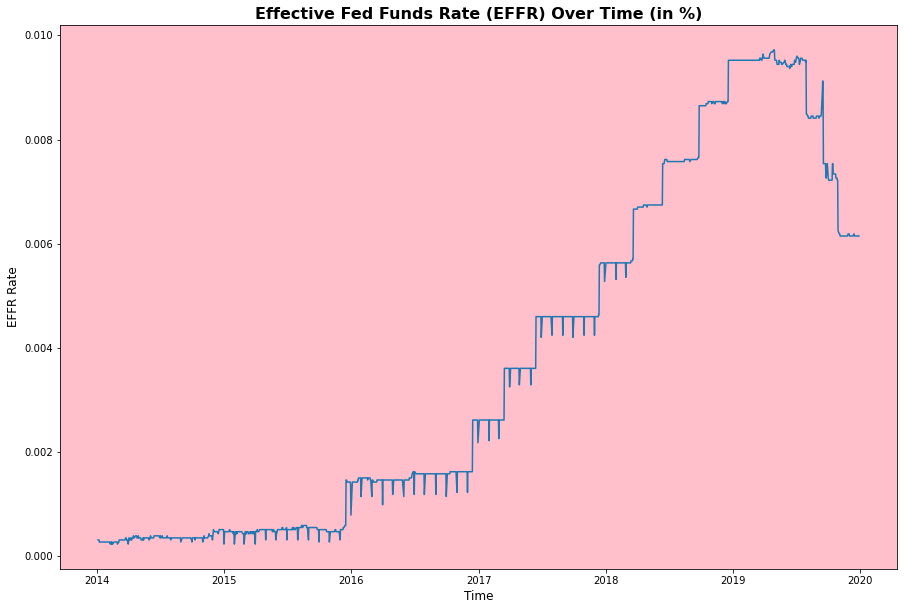

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["effr_rate"]*100)
ax.set_facecolor("pink")
ax.set_title('Effective Fed Funds Rate (EFFR) Over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=12)
ax.set_ylabel("EFFR Rate",fontsize=12)

plt.show()

<br id="2.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 2.3 Daily Excess Return Time Series</a>

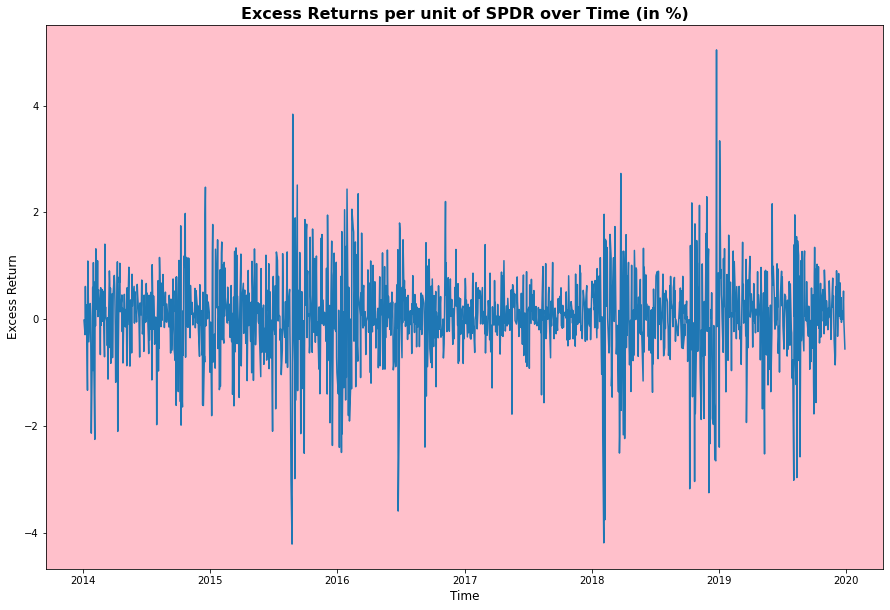

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(merged_data["excess_return"]*100)
ax.set_facecolor("pink")
ax.set_title('Excess Returns per unit of SPDR over Time (in %)',fontsize=16,weight='bold')
ax.set_xlabel("Time",fontsize=12)
ax.set_ylabel("Excess Return",fontsize=12)

plt.show()

In [12]:
i = 0
negative = [i for i in list(merged_data["excess_return"]) if i<0]
print(len(negative))

#So, almost half of the excess return values are negative, which is a realistic random scenario

687


<br id="3">
<a href="#index"  style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 3. Setting up the model  </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">


In [15]:
df_copy = merged_data.copy()
df_copy["Predictor Price Y"] = df_copy["Close"].shift(-1)
df = df_copy[:-1]
print(df)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-03  183.229996  183.600006  182.630005  182.889999  154.374908   
2014-01-06  183.490005  183.559998  182.080002  182.360001  153.927582   
2014-01-07  183.089996  183.789993  182.949997  183.479996  154.872910   
2014-01-08  183.449997  183.830002  182.889999  183.520004  154.906693   
2014-01-09  184.110001  184.130005  182.800003  183.639999  155.007980   
...                ...         ...         ...         ...         ...   
2019-12-20  320.459991  321.970001  319.390015  320.730011  304.585876   
2019-12-23  321.589996  321.649994  321.059998  321.220001  305.051208   
2019-12-24  321.470001  321.519989  320.899994  321.230011  305.060669   
2019-12-26  321.649994  322.950012  321.640015  322.940002  306.684601   
2019-12-27  323.739990  323.799988  322.279999  322.859985  306.608582   

               Volume  spdr_return  e

In [16]:
#Defining our independent and predictor variables 
x = df.iloc[:, 0:4]
y = df.iloc[:, 9]
print(x)
print(y)

                  Open        High         Low       Close
Date                                                      
2014-01-03  183.229996  183.600006  182.630005  182.889999
2014-01-06  183.490005  183.559998  182.080002  182.360001
2014-01-07  183.089996  183.789993  182.949997  183.479996
2014-01-08  183.449997  183.830002  182.889999  183.520004
2014-01-09  184.110001  184.130005  182.800003  183.639999
...                ...         ...         ...         ...
2019-12-20  320.459991  321.970001  319.390015  320.730011
2019-12-23  321.589996  321.649994  321.059998  321.220001
2019-12-24  321.470001  321.519989  320.899994  321.230011
2019-12-26  321.649994  322.950012  321.640015  322.940002
2019-12-27  323.739990  323.799988  322.279999  322.859985

[1507 rows x 4 columns]
Date
2014-01-03    182.360001
2014-01-06    183.479996
2014-01-07    183.520004
2014-01-08    183.639999
2014-01-09    184.139999
                 ...    
2019-12-20    321.220001
2019-12-23    321.230011
201

In [17]:
# Calculate the index for splitting the data
split_index = int(0.7 * len(x))
print(split_index)

# Split the data into training and testing sets
X_train, y_train = x.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = x.iloc[split_index:], y.iloc[split_index:]

1054


<br id="3.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 3.1 Hyperparameter Tuning of the Model </a>

In [37]:
#Hyperparameter Tuning for MLPRegressor 

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
params = {'hidden_layer_sizes': [(10,), (50,), (100,)],
          'max_iter':[200, 350, 500],
          'learning_rate_init': [0.001, 0.01, 0.1]
         }

# Initialize the MLPRegressor model
nn = MLPRegressor(random_state=42)

# Perform a grid search with cross-validation
grid_search = GridSearchCV(estimator=nn, param_grid=params, cv=6)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 200}
Best score: 0.9459522966085826


<br id="3.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;"> 3.2 Training the Model</a>

In [20]:
# Initialize the random forest regressor model
model = MLPRegressor(hidden_layer_sizes = (800,400,200,100),learning_rate_init = 0.01, max_iter=500, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Get predictions for the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  8.010936544894912


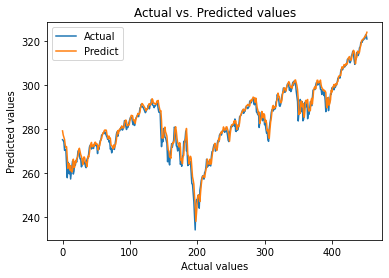

In [21]:
# Visualize the predicted values against the actual values
plt.plot(y_test.reset_index()["Predictor Price Y"])
plt.plot(y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend(["Actual","Predict"])
plt.title("Actual vs. Predicted values")
plt.show()

## **RULES:** 

#### 1. spdr_return is the rate that we borrow at the end of trading period on day i and sell it at the end of trading period on day (i+1) 
#### 2. For each strategy, we apply the 60/40 portfolio rule which means investing 60% of the capital in stocks and 40% in the bond & money market.
#### 3. No stock investments are made within the first time_window period due to our calculation of MA(time_window). We don't invest without prior and clear knowledge about the behaviour of the price using moving averages metric, leading us to make this decision. So, the whole total of 200,000 will be taken as unused capital, increased by the risk-free rate for initial time_window period.
#### 4. total_capital[i] (or V_total[i]) is the total amount of money accumulated before the the announcement of closing price on day i
#### 5. trading_capital[i] and unused_capital[i] are the amounts invested after the announcement of closing price on day i
#### 6. cum_trad_PnL[i+1], cum_total_PnL[i+1] and cum_cash_growth[i+1] are calculated on i+1_th day when the trading PnL and cash growth has been calculated just when closing the position on day i+1 since investing on day i
#### 7. All other quantities apart from these represent the values after investment made based on closing price of day i

<br id="4">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 4. Neural Network (MLP) Regressor Strategy </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

<br id="4.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.1 Training Set Strategy</a>

In [26]:
time_window1 = 100
df["MA_100"] = df["Close"].rolling(window = time_window1).mean()
MA1 = df["MA_100"]

price1 = df["Close"][:split_index]
n = len(price1)
riskfree = df["effr_rate"][:split_index]

/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_82852/1819986086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MA_100"] = df["Close"].rolling(window = time_window1).mean()


In [27]:
print(n)

1054


In [28]:
unused_capital1 = np.zeros(np.shape(price1))
daily_cash_growth1 = np.zeros(np.shape(price1))
daily_trad_PnL1 = np.zeros(np.shape(price1))
daily_total_PnL1 = np.zeros(np.shape(price1))
total_capital1 = np.zeros(np.shape(price1))
trading_capital1 = np.zeros(np.shape(price1))
residual_capital1 = np.zeros(np.shape(price1))
units1 = np.zeros(np.shape(price1))
theta1 = np.zeros(np.shape(price1))
position1 = np.zeros(np.shape(price1))
cum_trad_PnL1 = np.zeros(np.shape(price1)) 
cum_total_PnL1 = np.zeros(np.shape(price1)) 
cum_cash_growth1 = np.zeros(np.shape(price1))
unit_turnover1 = np.zeros(np.shape(price1))
dollar_turnover1 = np.zeros(np.shape(price1))

stock_cash_split = 0.6 #60/40 portfolio rule 
L = 5
total_capital1[0] = 200000
    
for i in range(n-1): #this runs from 0 to n-2 (including) days

    #We do not make the investment within the first time_window period due to our calculation of MA(time_window)
    #So, the whole total of 200,000 will be invested as unused capital, increased by the risk-free rate
    #over that period. 

    if i<time_window1:        
        unused_capital1[i] = total_capital1[i]
        daily_cash_growth1[i] = unused_capital1[i] * riskfree[i]   
        daily_trad_PnL1[i] = 0
        daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
        total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i] 
        cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]
        cum_total_PnL1[i+1] = cum_total_PnL1[i] + daily_total_PnL1[i]

        #there's no cum_trad_PnL as we don't make trades for first time_window days

    if i>=time_window1:

        if MA1[i] > price1[i]:            
            position1[i] = 1

        elif MA1[i] < price1[i]:
            position1[i] = -1

        trading_capital1[i] = stock_cash_split*total_capital1[i] # 60% of total available money is availed for stocks
        units1[i] = position1[i]*np.floor(trading_capital1[i]*L/price1[i]) #long and short whole stocks
        unit_turnover1[i] = abs(units1[i] - units1[i-1])
        print(units1[i],units1[i-1],unit_turnover1[i])

        #we now check with the given constraints 
        theta1[i]=units1[i]*price1[i] 

        if(abs(theta1[i])<=trading_capital1[i]*L):     
            theta1[i]=units1[i]*price1[i]
        else:
            theta1[i]=position1[i]*trading_capital1[i]*L
        
        dollar_turnover1[i] = abs(theta1[i] - theta1[i-1])
        print(theta1[i],theta1[i-1],dollar_turnover1[i])

        #Calculating daily trading PnL
        daily_trad_PnL1[i] = merged_data["excess_return"][i+1]*theta1[i]
        cum_trad_PnL1[i+1] = cum_trad_PnL1[i] + daily_trad_PnL1[i] 

        #Calculating daily cash growth
        residual_capital1[i] = trading_capital1[i] - abs(theta1[i])/L
        unused_capital1[i] = (1-stock_cash_split)*total_capital1[i] + residual_capital1[i]
        daily_cash_growth1[i] = unused_capital1[i] * riskfree[i] 
        cum_cash_growth1[i+1] = cum_cash_growth1[i] + daily_cash_growth1[i]

        #Calculating daily total PnL
        daily_total_PnL1[i] = daily_cash_growth1[i] + daily_trad_PnL1[i]
        cum_total_PnL1[i] = cum_total_PnL1[i-1] + daily_total_PnL1[i]
        total_capital1[i+1] = total_capital1[i] + daily_total_PnL1[i] 


-3119.0 0.0 3119.0
-600002.0147705078 0.0 600002.0147705078
-3099.0 -3119.0 20.0
-597115.2973022461 -600002.0147705078 2886.7174682617188
-3085.0 -3099.0 14.0
-595096.4811706543 -597115.2973022461 2018.8161315917969
-3092.0 -3085.0 7.0
-596137.6094360352 -595096.4811706543 1041.1282653808594
-3067.0 -3092.0 25.0
-592513.737487793 -596137.6094360352 3623.8719482421875
-2987.0 -3067.0 80.0
-580822.1408843994 -592513.737487793 11691.596603393555
-2931.0 -2987.0 56.0
-572658.7943115234 -580822.1408843994 8163.346572875977
-2919.0 -2931.0 12.0
-570898.0253448486 -572658.7943115234 1760.7689666748047
-2917.0 -2919.0 2.0
-570565.2178039551 -570898.0253448486 332.8075408935547
-2958.0 -2917.0 41.0
-576573.3545837402 -570565.2178039551 6008.136779785156
-3043.0 -2958.0 85.0
-588942.1995697021 -576573.3545837402 12368.844985961914
-3006.0 -3043.0 37.0
-583554.7946777344 -588942.1995697021 5387.404891967773
-2996.0 -3006.0 10.0
-582092.8198852539 -583554.7946777344 1461.9747924804688
-2963.0 -299

-4899.0 -4841.0 58.0
-1018796.0728912354 -1009735.7888641357 9060.28402709961
-4667.0 -4899.0 232.0
-982216.8513336182 -1018796.0728912354 36579.22155761719
-4752.0 -4667.0 85.0
-995544.0 -982216.8513336182 13327.148666381836
-4670.0 -4752.0 82.0
-982614.7171020508 -995544.0 12929.282897949219
-4707.0 -4670.0 37.0
-988470.0 -982614.7171020508 5855.282897949219
-4813.0 -4707.0 106.0
-1005050.6952514648 -988470.0 16580.695251464844
5099.0 -4813.0 9912.0
1049170.2119903564 -1005050.6952514648 2054220.9072418213
5075.0 5099.0 24.0
1041745.2716827393 1049170.2119903564 7424.9403076171875
5098.0 5075.0 23.0
1048862.5480041504 1041745.2716827393 7117.276321411133
-5221.0 5098.0 10319.0
-1087273.25 1048862.5480041504 2136135.7980041504
-5405.0 -5221.0 184.0
-1115754.1104125977 -1087273.25 28480.860412597656
5482.0 -5405.0 10887.0
1127647.3832702637 -1115754.1104125977 2243401.4936828613
-5521.0 5482.0 11003.0
-1139755.253479004 1127647.3832702637 2267402.6367492676
-5374.0 -5521.0 147.0
-11168

1447264.543762207 1474781.7144317627 27517.170669555664
-7408.0 7170.0 14578.0
-1520566.0393066406 1447264.543762207 2967830.5830688477
-7087.0 -7408.0 321.0
-1470623.3310699463 -1520566.0393066406 49942.708236694336
-7157.0 -7087.0 70.0
-1481499.0 -1470623.3310699463 10875.668930053711
-7213.0 -7157.0 56.0
-1490205.8440246582 -1481499.0 8706.844024658203
-6888.0 -7213.0 325.0
-1439247.5789794922 -1490205.8440246582 50958.265045166016
-6904.0 -6888.0 16.0
-1441762.3326416016 -1439247.5789794922 2514.753662109375
-7024.0 -6904.0 120.0
-1460500.2685546875 -1441762.3326416016 18737.935913085938
-6696.0 -7024.0 328.0
-1408771.435913086 -1460500.2685546875 51728.83264160156
-6618.0 -6696.0 78.0
-1396398.0 -1408771.435913086 12373.435913085938
-6699.0 -6618.0 81.0
-1409201.6440887451 -1396398.0 12803.644088745117
-6726.0 -6699.0 27.0
-1413468.858947754 -1409201.6440887451 4267.214859008789
-6740.0 -6726.0 14.0
-1415669.5547485352 -1413468.858947754 2200.69580078125
-6994.0 -6740.0 254.0
-145

-1983614.0935668945 -1999664.9669647217 16050.873397827148
-9204.0 -9166.0 38.0
-1989812.7824707031 -1983614.0935668945 6198.688903808594
-9052.0 -9204.0 152.0
-1965098.646850586 -1989812.7824707031 24714.135620117188
-9190.0 -9052.0 138.0
-1987521.339263916 -1965098.646850586 22422.692413330078
-9026.0 -9190.0 164.0
-1960808.2895812988 -1987521.339263916 26713.049682617188
-9125.0 -9026.0 99.0
-1976931.19430542 -1960808.2895812988 16122.904724121094
-9108.0 -9125.0 17.0
-1974159.0 -1976931.19430542 2772.194305419922
-9148.0 -9108.0 40.0
-1980724.9990844727 -1974159.0 6565.999084472656
-9106.0 -9148.0 42.0
-1973907.6589050293 -1980724.9990844727 6817.340179443359
-9048.0 -9106.0 58.0
-1964501.7158203125 -1973907.6589050293 9405.943084716797
-9078.0 -9048.0 30.0
-1969381.342163086 -1964501.7158203125 4879.6263427734375
-9313.0 -9078.0 235.0
-2007417.1784210205 -1969381.342163086 38035.83625793457
-9205.0 -9313.0 108.0
-1989936.8325805664 -2007417.1784210205 17480.3458404541
-9166.0 -920

-1609077.2645874023 -1607907.5795288086 1169.68505859375
-6739.0 -6714.0 25.0
-1613586.1764526367 -1609077.2645874023 4508.911865234375
-6692.0 -6739.0 47.0
-1605210.0073242188 -1613586.1764526367 8376.169128417969
-6747.0 -6692.0 55.0
-1615096.892944336 -1605210.0073242188 9886.885620117188
-6793.0 -6747.0 46.0
-1623391.1109771729 -1615096.892944336 8294.218032836914
-6645.0 -6793.0 148.0
-1596793.5202789307 -1623391.1109771729 26597.590698242188
-6670.0 -6645.0 25.0
-1601333.6122131348 -1596793.5202789307 4540.091934204102
-7153.0 -6670.0 483.0
-1686820.5123901367 -1601333.6122131348 85486.90017700195
-7039.0 -7153.0 114.0
-1666624.0600738525 -1686820.5123901367 20196.45231628418
-6858.0 -7039.0 181.0
-1634329.963256836 -1666624.0600738525 32294.0968170166
-6720.0 -6858.0 138.0
-1609574.4287109375 -1634329.963256836 24755.534545898438
-6661.0 -6720.0 59.0
-1598973.0703277588 -1609574.4287109375 10601.358383178711
-6600.0 -6661.0 61.0
-1588026.0040283203 -1598973.0703277588 10947.0662

-1250205.1711120605 -1312521.5703735352 62316.39926147461
-4343.0 -4551.0 208.0
-1206919.6734924316 -1250205.1711120605 43285.497619628906
-4563.0 -4343.0 220.0
-1252224.0565795898 -1206919.6734924316 45304.3830871582
-4751.0 -4563.0 188.0
-1290609.1210021973 -1252224.0565795898 38385.06442260742
-5032.0 -4751.0 281.0
-1347066.4614257812 -1290609.1210021973 56457.340423583984
-4930.0 -5032.0 102.0
-1326564.3338012695 -1347066.4614257812 20502.12762451172
-4705.0 -4930.0 225.0
-1280653.9614868164 -1326564.3338012695 45910.372314453125
-4659.0 -4705.0 46.0
-1271347.9427490234 -1280653.9614868164 9306.018737792969
-4666.0 -4659.0 7.0
-1272791.4743041992 -1271347.9427490234 1443.5315551757812
-4577.0 -4666.0 89.0
-1254555.727935791 -1272791.4743041992 18235.746368408203
-4265.0 -4577.0 312.0
-1189380.5291748047 -1254555.727935791 65175.19876098633


In [29]:
print(total_capital1[n-1]) 

398087.41156606405


<br id="4.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">4.2 Test Set Neural Network (MLP) Regressor Strategy</a>

In [30]:
price2 = df["Close"][split_index:]
n = len(price2)
riskfree = df["effr_rate"][split_index:]

In [31]:
print(n)

453


In [34]:
unused_capital2 = np.zeros(np.shape(price2))
daily_cash_growth2 = np.zeros(np.shape(price2))
daily_trad_PnL2 = np.zeros(np.shape(price2))
daily_total_PnL2 = np.zeros(np.shape(price2))
total_capital2 = np.zeros(np.shape(price2))
trading_capital2 = np.zeros(np.shape(price2))
residual_capital2 = np.zeros(np.shape(price2))
units2 = np.zeros(np.shape(price2))
theta2 = np.zeros(np.shape(price2))
position2 = np.zeros(np.shape(price2))
cum_trad_PnL2 = np.zeros(np.shape(price2)) 
cum_total_PnL2 = np.zeros(np.shape(price2)) 
cum_cash_growth2 = np.zeros(np.shape(price2))
unit_turnover2 = np.zeros(np.shape(price2))
dollar_turnover2 = np.zeros(np.shape(price2))
 
stock_cash_split = 0.6 #60 - 40 portfolio rule
L = 5
total_capital2[0] = 200000

for i in range(n-1): 
    
    #Here, we don't have an initial investment in only money market as we have the prediction values from the 
    #very beginning of the test set data. 
    
    if  y_pred[i] > price2[i]:            
        position2[i] = 1

    else:
        position2[i] = -1

    trading_capital2[i] = stock_cash_split*total_capital2[i] # 60% of total available money is availed for stocks
    units2[i] = position2[i]*np.floor(trading_capital2[i]*L/price2[i]) #long and short whole stocks
    unit_turnover2[i] = abs(units2[i] - units2[i-1])

    #we now check with the given constraints 
    theta2[i]=units2[i]*price2[i] 

    if(abs(theta2[i])<=trading_capital2[i]*L):     
        theta2[i]=units2[i]*price2[i]
    else:
        theta2[i]=position2[i]*trading_capital2[i]*L

    dollar_turnover2[i] = abs(theta2[i] - theta2[i-1])

    #Calculating daily trading PnL
    daily_trad_PnL2[i] = merged_data["excess_return"][1054+i+1]*theta2[i]
    cum_trad_PnL2[i+1] = cum_trad_PnL2[i] + daily_trad_PnL2[i] 

    #Calculating daily cash growth
    residual_capital2[i] = trading_capital2[i] - abs(theta2[i])/L
    unused_capital2[i] = (1-stock_cash_split)*total_capital2[i] + residual_capital2[i]
    daily_cash_growth2[i] = unused_capital2[i] * riskfree[i] 
    cum_cash_growth2[i+1] = cum_cash_growth2[i] + daily_cash_growth2[i]

    #Calculating daily total PnL
    daily_total_PnL2[i] = daily_cash_growth2[i] + daily_trad_PnL2[i]
    cum_total_PnL2[i] = cum_total_PnL2[i-1] + daily_total_PnL2[i]
    total_capital2[i+1] = total_capital2[i] + daily_total_PnL2[i]
              

In [35]:
total_capital2[n-1]

304677.63345501316

<br id="5">
<a href="#index" style="color:#033a91; font-size: 22px; text-decoration: none; font-weight:bold;"> 5. Model Comparison </a>
<hr style="height:1px;border-width:0;color:gray;background-color:gray">

<br id="5.1">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.1 Position of Strategies Plot</a>


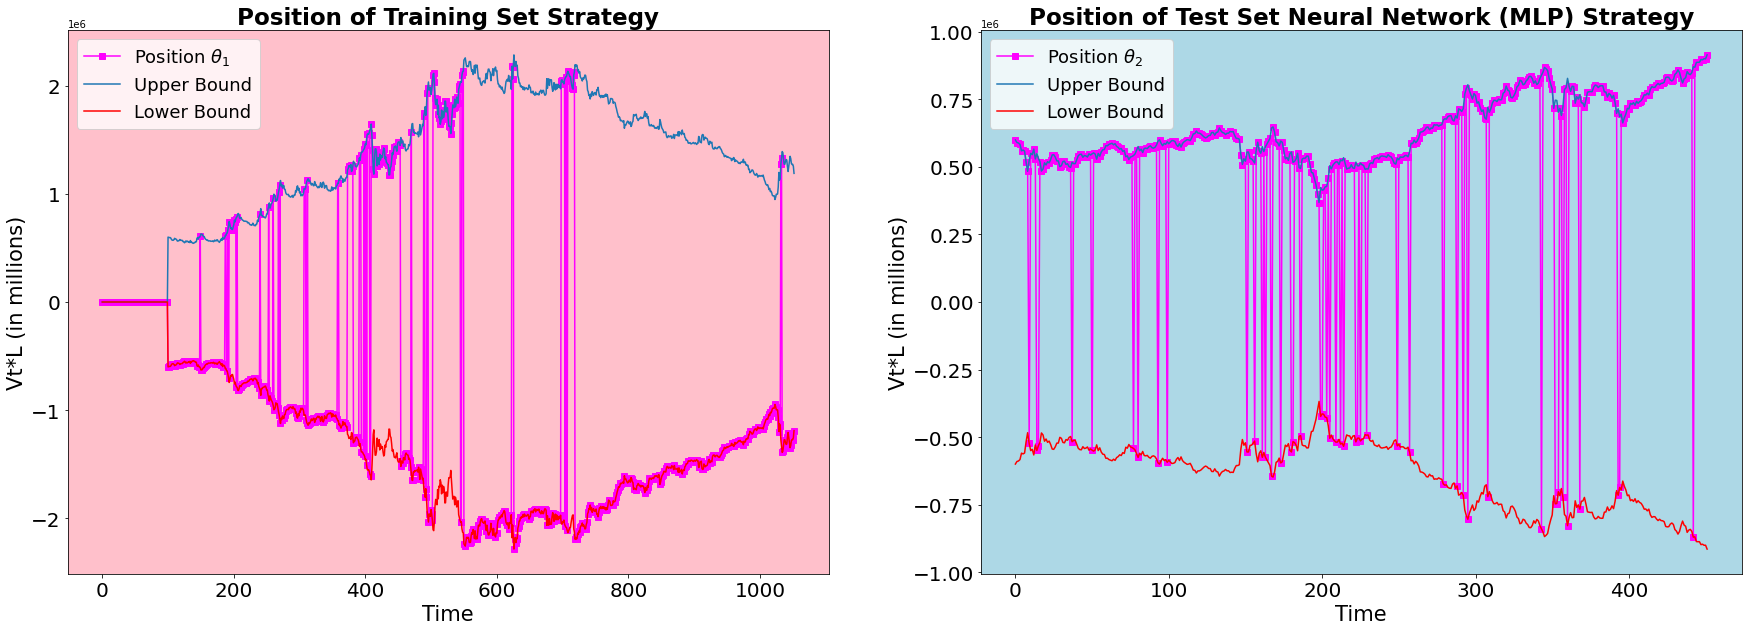

In [58]:
#Plot with upper and lower bounds 

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(theta1[:-1], marker="s", color="magenta")
ax[0].plot(trading_capital1[:-1]*L)
ax[0].plot(-trading_capital1[:-1]*L, color="red")  
ax[0].set_facecolor("pink")
ax[0].set_title('Position of Training Set Strategy',fontsize=23,weight='bold')
ax[0].legend(["Position $\\theta_1$","Upper Bound","Lower Bound"],fontsize=18)
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Vt*L (in millions)",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(theta2[:-1], marker="s", color="magenta")
ax[1].plot(trading_capital2[:-1]*L)
ax[1].plot(-trading_capital2[:-1]*L, color="red")  
ax[1].set_facecolor("lightblue")
ax[1].set_title('Position of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].legend(["Position $\\theta_2$","Upper Bound","Lower Bound"],fontsize=18)
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Vt*L (in millions)",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)0

<br id="5.2">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.2 Turnover Dollars and Turnover Units</a>

In [41]:
print(f"Turnover in Units for  Training Set Strategy: {sum(unit_turnover1)} ")
print(f"Turnover in Dollars for Training Set Strategy: {sum(dollar_turnover1)} ")
print("")
print(f"Turnover in Units for Test Set Neural Network (MLP) Strategy: {sum(unit_turnover2)} ")
print(f"Turnover in Dollars for for Test Set Neural Network (MLP) Strategy: {sum(dollar_turnover2)} ")
print("")

Turnover in Units for  Training Set Strategy: 862891.0 
Turnover in Dollars for Training Set Strategy: 176797640.7043152 

Turnover in Units for Test Set Neural Network (MLP) Strategy: 349128.0 
Turnover in Dollars for for Test Set Neural Network (MLP) Strategy: 98071727.45318604 



<br id="5.3">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.3 Daily Trading PnL Plot</a>

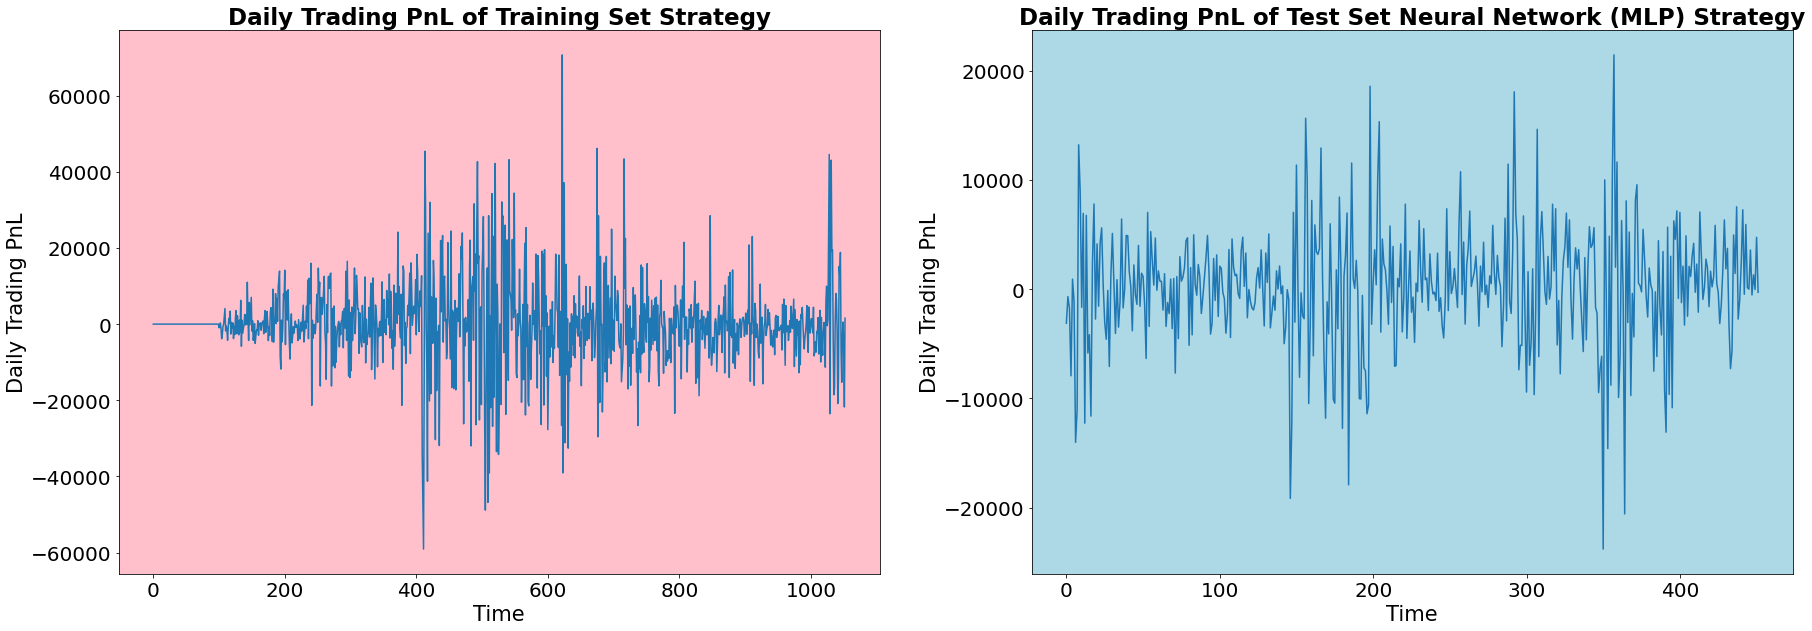

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(daily_trad_PnL1[:-1])
ax[0].set_facecolor("pink")
ax[0].set_title('Daily Trading PnL of Training Set Strategy',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Trading PnL",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(daily_trad_PnL2[:-1])
ax[1].set_facecolor("lightblue")
ax[1].set_title('Daily Trading PnL of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Trading PnL",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)

<br id="5.4">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.4 Cumulative Trading PnL Plot</a>

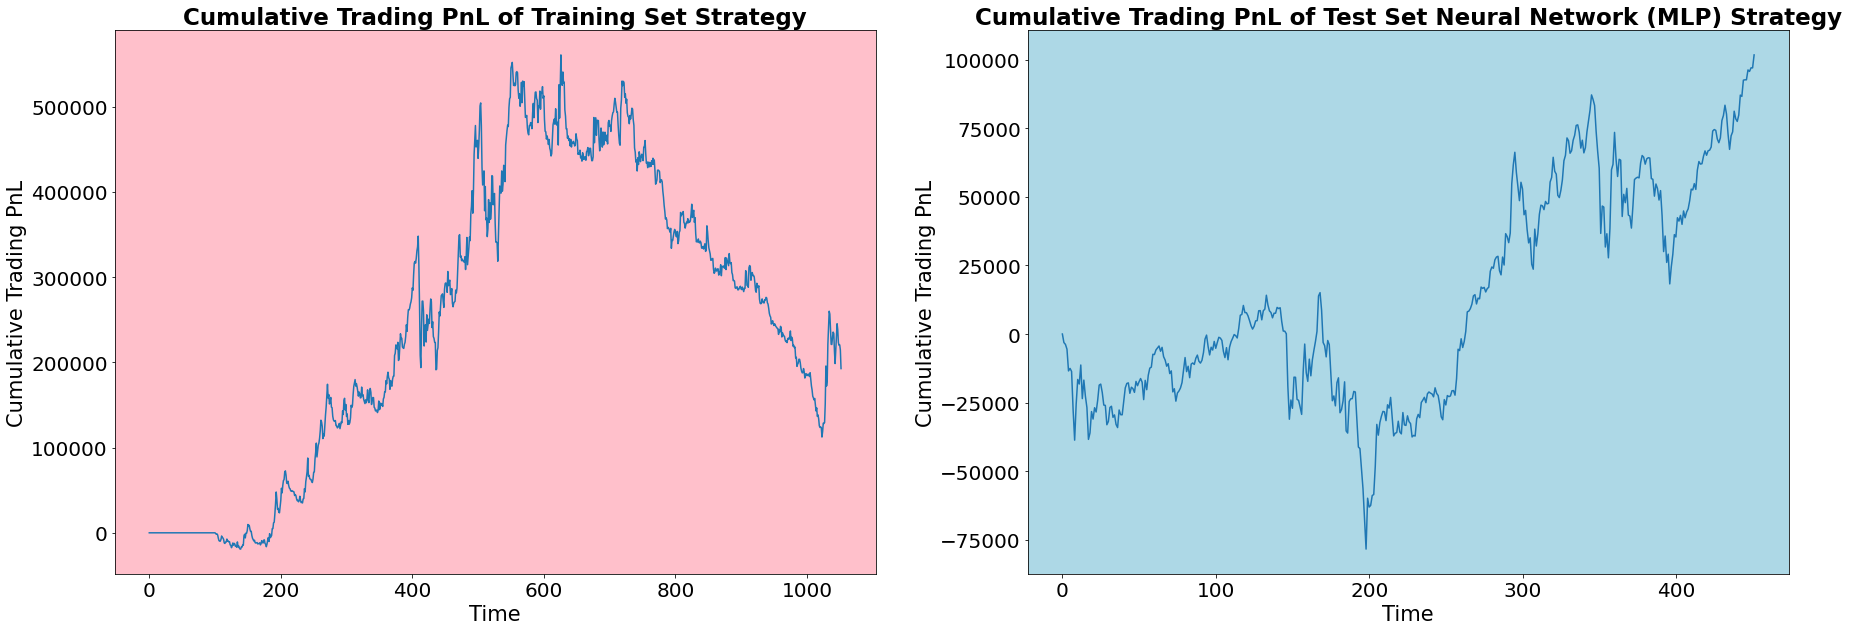

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(cum_trad_PnL1[:-1])
ax[0].set_facecolor("pink")
ax[0].set_title('Cumulative Trading PnL of Training Set Strategy',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Cumulative Trading PnL",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(cum_trad_PnL2[:-1])
ax[1].set_facecolor("lightblue")
ax[1].set_title('Cumulative Trading PnL of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Cumulative Trading PnL",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)

<br id="5.5">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.5 Daily Cash Growth Plot</a>

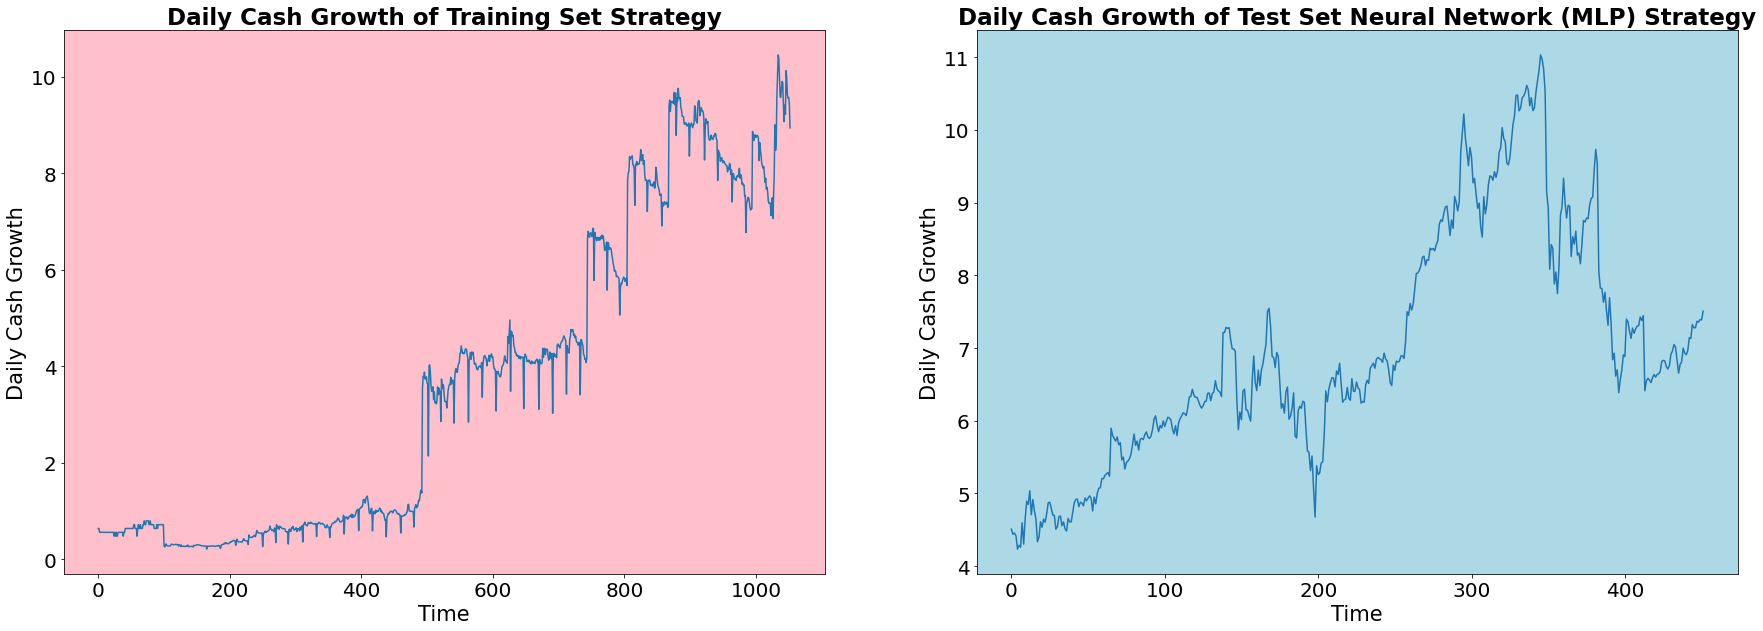

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(daily_cash_growth1[:-1])
ax[0].set_facecolor("pink")
ax[0].set_title('Daily Cash Growth of Training Set Strategy',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Cash Growth",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(daily_cash_growth2[:-1])
ax[1].set_facecolor("lightblue")
ax[1].set_title('Daily Cash Growth of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Cash Growth",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)

<br id="5.6">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.6 Cumulative Cash Growth Plot</a>

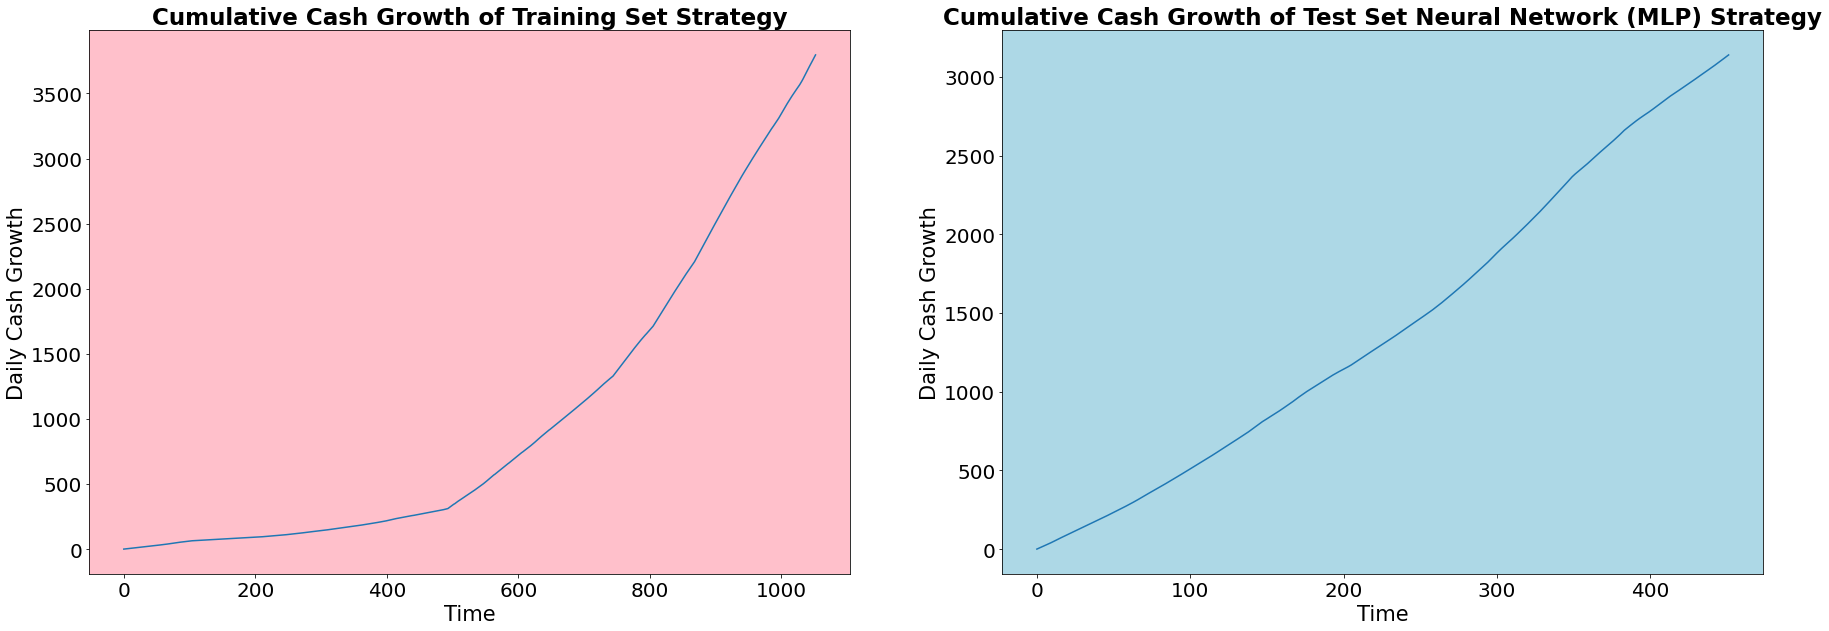

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(cum_cash_growth1[:-1])
ax[0].set_facecolor("pink")
ax[0].set_title('Cumulative Cash Growth of Training Set Strategy',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Cash Growth",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(cum_cash_growth2[:-1])
ax[1].set_facecolor("lightblue")
ax[1].set_title('Cumulative Cash Growth of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Cash Growth",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)


<br id="5.7">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.7 Daily Total PnL Plot</a>

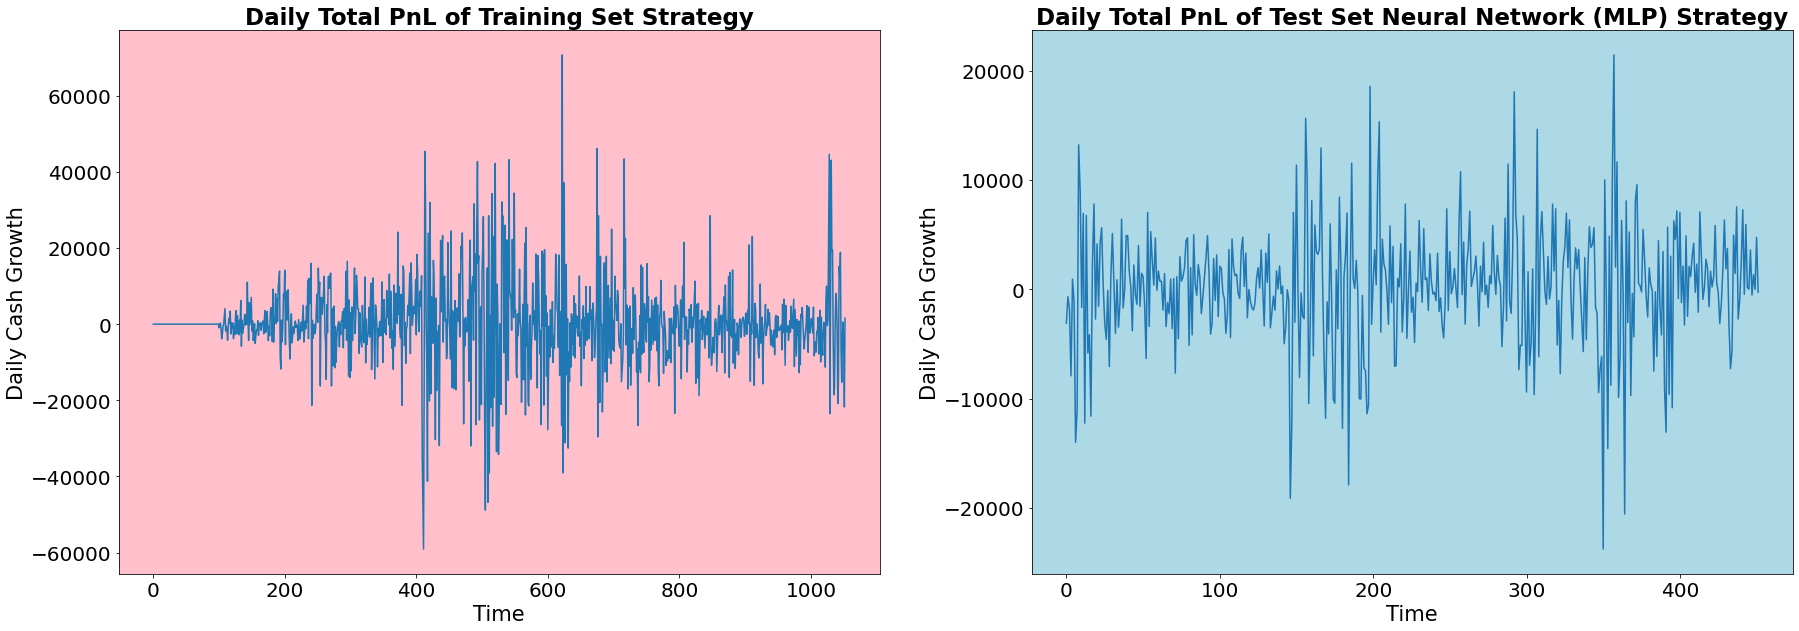

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(daily_total_PnL1[:-1])
ax[0].set_facecolor("pink")
ax[0].set_title('Daily Total PnL of Training Set Strategy',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Cash Growth",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(daily_total_PnL2[:-1])
ax[1].set_facecolor("lightblue")
ax[1].set_title('Daily Total PnL of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Cash Growth",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)


<br id="5.8">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.8 Cumulative Total PnL Plot</a>

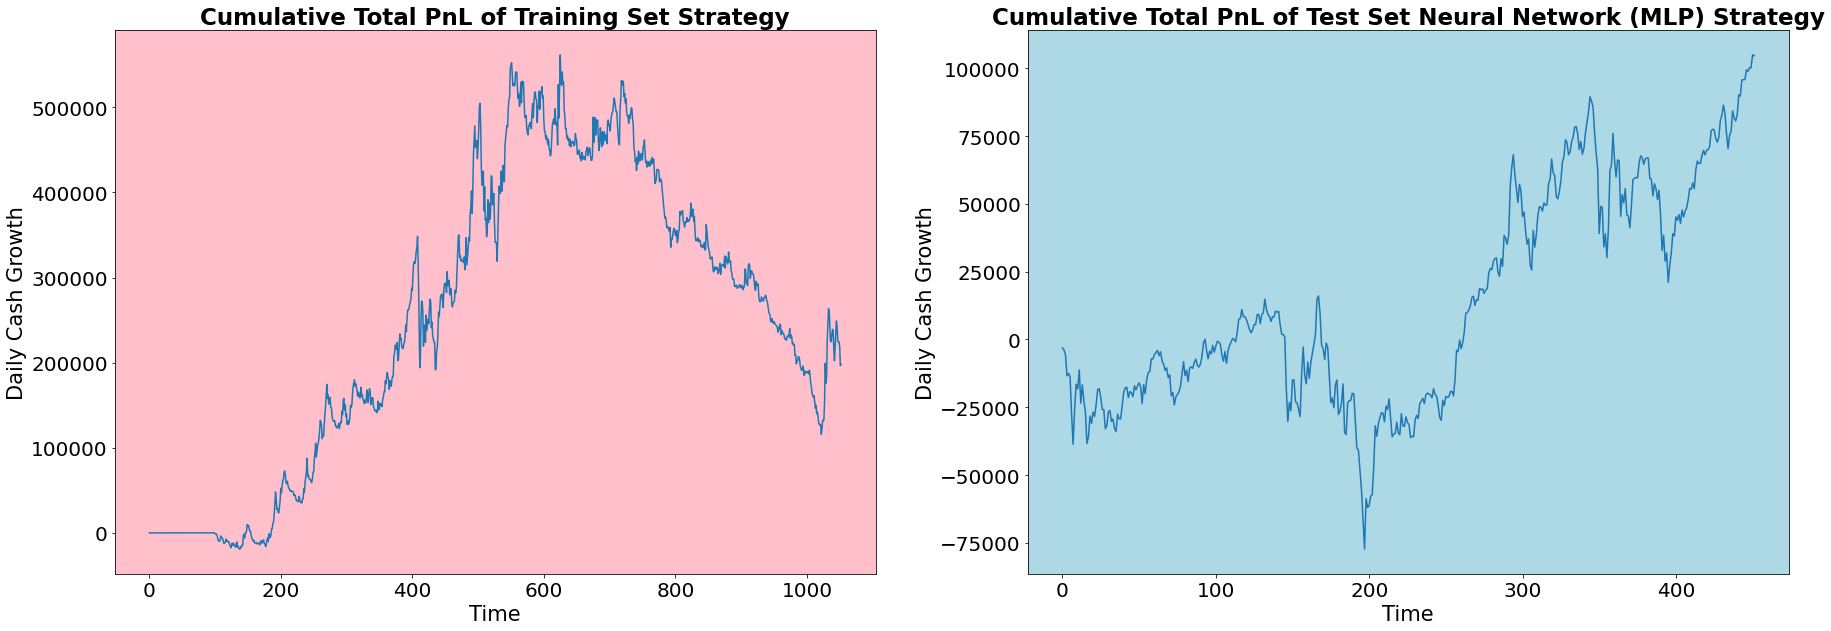

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(cum_total_PnL1[:-1])
ax[0].set_facecolor("pink")
ax[0].set_title('Cumulative Total PnL of Training Set Strategy',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Daily Cash Growth",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=20)

ax[1].plot(cum_total_PnL2[:-1])
ax[1].set_facecolor("lightblue")
ax[1].set_title('Cumulative Total PnL of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Daily Cash Growth",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=20)


- Sharpe Ratio
- Sortino Ratio
- Maximum Drawdown
- Calmar Ratio
- Plot Drawdown Chart and 90-day volatility of underlying asset p_t

#for all strategies collective
- Plot of 3 avg. excess returns with std. with spdr excess return with std.


<br id="5.9">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.9 Sharpe Ratio</a>

In [52]:
# As we don't have any trading PnL for the first 100 days for training set because of no stock investment within 
# that period for mean reversion strategy, we think its better to caclulate mean and std dev for the period 
# after that

#the use of sqrt 252 to convert daily to annual Sharpe Ratio
sharpe_ratio1 = (daily_trad_PnL1[100:].mean()/daily_trad_PnL1[100:].std())*np.sqrt(252)
sharpe_ratio2 = (daily_trad_PnL2.mean()/daily_trad_PnL2.std())*np.sqrt(252) 

print(f"The Sharpe Ratio for Training Set Strategy is: {sharpe_ratio1}")
print(f"The Sharpe Ratio for Test Set Neural Network (MLP) Strategy is: {sharpe_ratio2}")


The Sharpe Ratio for Training Set Strategy is: 0.27383532705920954
The Sharpe Ratio for Test Set Neural Network (MLP) Strategy is: 0.6517217256695537


<br id="5.10">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.10 Sortino Ratio</a>

In [53]:
daily_trad_PnL1_ = daily_trad_PnL1[100:]
neg_std1 = daily_trad_PnL1_[daily_trad_PnL1_<0].std()
sortino_ratio1 = (daily_trad_PnL1_.mean()/neg_std1)*np.sqrt(252) #

daily_trad_PnL2_ = daily_trad_PnL2
neg_std2 = daily_trad_PnL2_[daily_trad_PnL2_<0].std()
sortino_ratio2 = (daily_trad_PnL2_.mean()/neg_std2)*np.sqrt(252)

print(f"The Sortino Ratio for Training Set Strategy is: {sortino_ratio1}")
print(f"The Sortino Ratio for Test Set Neural Network (MLP) Strategy is: {sortino_ratio2}")


The Sortino Ratio for Training Set Strategy is: 0.3767400318835389
The Sortino Ratio for Test Set Neural Network (MLP) Strategy is: 0.8705922618921872


<br id="5.11">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.11 Maximum Drawdown</a>

In [72]:
cum_trad_PnL1_ = cum_trad_PnL1[100:]
max_drawdown1 = (cum_trad_PnL1_.min()-cum_trad_PnL1_.max())/cum_trad_PnL1_.max()

cum_trad_PnL2_ = cum_trad_PnL2
max_drawdown2 = (cum_trad_PnL2_.min()-cum_trad_PnL2_.max())/cum_trad_PnL2_.max()

print(max_drawdown1,max_drawdown2)


-1.034072220441526 -1.7705440095396952


<br id="5.12">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.12 Calmar Ratio</a>

In [73]:
initial=200000

r1 = daily_trad_PnL1_[100:].mean()/initial 
val1 = initial*((1+r1)**(252))
val1
arr1 = (val1 - initial)/initial
calmar_ratio1_ = arr1/abs(max_drawdown1)
print(calmar_ratio1_)

r2 = daily_trad_PnL2_.mean()/initial
val2 = initial*((1+r2)**(252))
val2
arr2 = (val2 - initial)/initial
calmar_ratio2_ = arr2/abs(max_drawdown2)
print(calmar_ratio2_)

0.2505175297681017
0.184182957832509


<br id="5.13">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.13 Drawdown Chart and 90-day stock volatility</a>

In [87]:
dd1 = np.zeros(np.shape(merged_data["Close"][0:1054]))
dd2 = np.zeros(np.shape(merged_data["Close"][1054:]))

for i in range(1053): #n-1 for the training set 
    dd1[i] = max(daily_trad_PnL1[:i+1]) - daily_trad_PnL1[i]
for i in range(452): #n-1 for the test set
    dd2[i] = max(daily_trad_PnL2[:i+1]) - daily_trad_PnL2[i]

In [88]:
# Compute 90-day rolling 
rolling_vol = merged_data["Close"].rolling(window = 90).std()

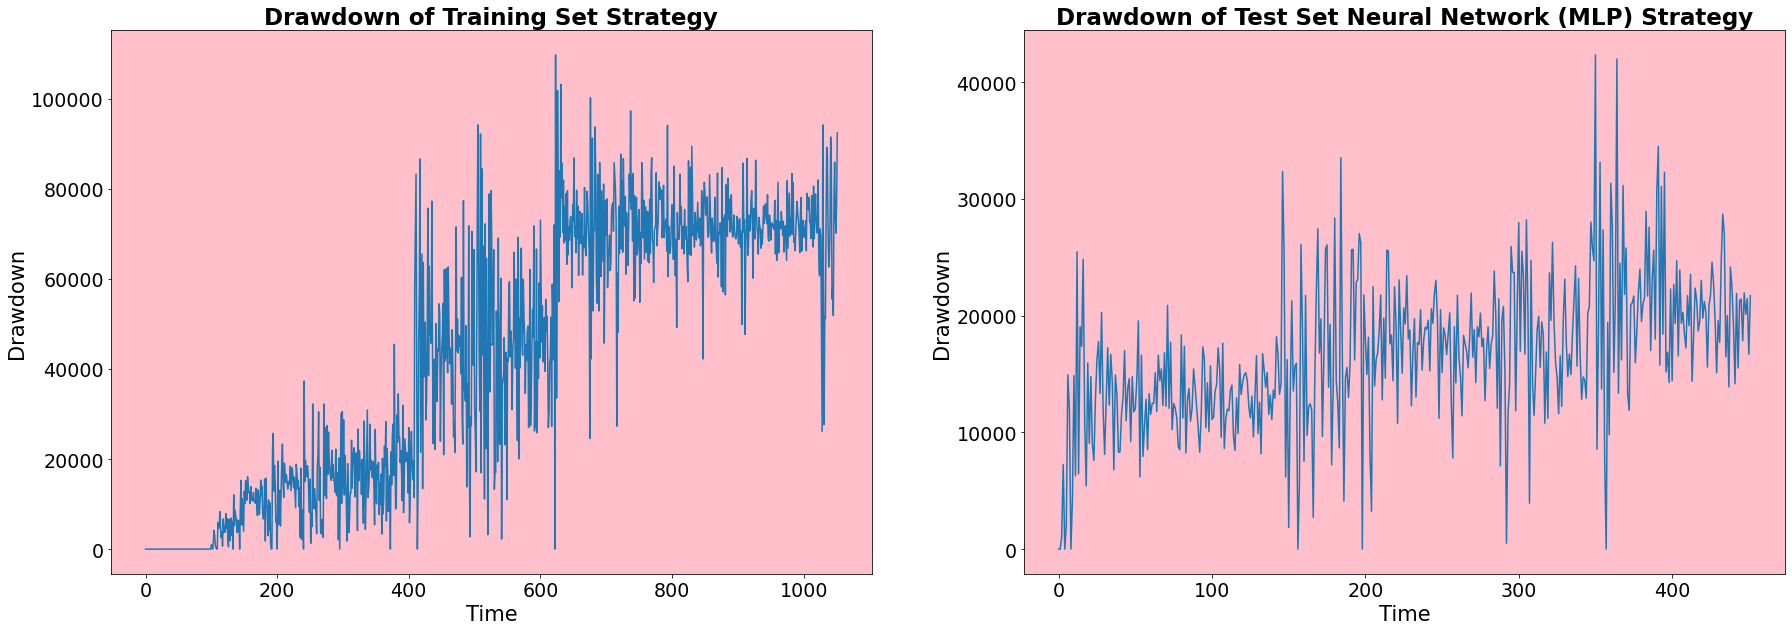

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

ax[0].plot(dd1[:-2]) #as we have daily_trad_PnL[n-2] as the last value in our strategies
ax[0].set_facecolor("pink")
ax[0].set_title('Drawdown of Training Set Strategy',fontsize=23,weight='bold')
ax[0].set_xlabel("Time",fontsize=21)
ax[0].set_ylabel("Drawdown",fontsize=21)
ax[0].tick_params(axis='both', which='major', labelsize=19)

ax[1].plot(dd2[:-2])
ax[1].set_facecolor("pink")
ax[1].set_title('Drawdown of Test Set Neural Network (MLP) Strategy',fontsize=23,weight='bold')
ax[1].set_xlabel("Time",fontsize=21)
ax[1].set_ylabel("Drawdown",fontsize=21)
ax[1].tick_params(axis='both', which='major', labelsize=19)

plt.show()

<br id="5.14">
<a href="#index" style="color:#033a91; font-size: 16px; text-decoration: none; font-weight:bold;">5.14 Plot of 3 avg. excess returns with std. with spdr excess return with std.</a>

#### The Plot Is Made in "Strategy 1 - Mean Reversion Strategy" file

In [98]:
#WE USE THE RESULTANT VALUES DIRECRLY ON THE PLOT IN STRATEGY 1

print(f"The mean of the daily trading PnL of Training Strategy: {(daily_trad_PnL1[100:]/trading_capital1[100:])[:-1].mean()}")
print(f"The std dev of the daily trading PnL of Training Strategy: {(daily_trad_PnL1[100:]/trading_capital1[100:])[:-1].std()}")

print(f"The mean of the daily trading PnL of Test Neural Network Strategy: {(daily_trad_PnL2/trading_capital2)[:-1].mean()}")
print(f"The std dev of the daily trading PnL of Test Neural Network Strategy: {(daily_trad_PnL2/trading_capital2)[:-1].std()}")


The mean of the daily trading PnL of Training Strategy: 0.0016636614547748975
The std dev of the daily trading PnL of Training Strategy: 0.0397995591634479
The mean of the daily trading PnL of Test Neural Network Strategy: 0.0021261366633541713
The std dev of the daily trading PnL of Test Neural Network Strategy: 0.04577650197513602


/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_82852/1079800217.py:3: RuntimeWarning: invalid value encountered in true_divide
  print(f"The mean of the daily trading PnL of Training Strategy: {(daily_trad_PnL1[100:]/trading_capital1[100:])[:-1].mean()}")
/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_82852/1079800217.py:4: RuntimeWarning: invalid value encountered in true_divide
  print(f"The std dev of the daily trading PnL of Training Strategy: {(daily_trad_PnL1[100:]/trading_capital1[100:])[:-1].std()}")
/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_82852/1079800217.py:6: RuntimeWarning: invalid value encountered in true_divide
  print(f"The mean of the daily trading PnL of Test Neural Network Strategy: {(daily_trad_PnL2/trading_capital2)[:-1].mean()}")
/var/folders/qs/_ffmzjk16gv43f9ntt_xdyrc0000gn/T/ipykernel_82852/1079800217.py:7: RuntimeWarning: invalid value encountered in true_divide
  print(f"The std dev of the daily trading PnL of Test N